In [1]:
import raster_geometry as rg
import numpy as np
import matplotlib.pyplot as plt
from segment_everything.stacked_labels import StackedLabels

In [6]:
nx, ny = (2048, 2048)




0 [64.0, 64.0]
1 [192.0, 64.0]
2 [320.0, 64.0]
3 [448.0, 64.0]
4 [576.0, 64.0]
5 [704.0, 64.0]
6 [832.0, 64.0]
7 [960.0, 64.0]
8 [1088.0, 64.0]
9 [1216.0, 64.0]
10 [1344.0, 64.0]
11 [1472.0, 64.0]
12 [1600.0, 64.0]
13 [1728.0, 64.0]
14 [1856.0, 64.0]
15 [1984.0, 64.0]
16 [64.0, 192.0]
17 [192.0, 192.0]
18 [320.0, 192.0]
19 [448.0, 192.0]
20 [576.0, 192.0]
21 [704.0, 192.0]
22 [832.0, 192.0]
23 [960.0, 192.0]
24 [1088.0, 192.0]
25 [1216.0, 192.0]
26 [1344.0, 192.0]
27 [1472.0, 192.0]
28 [1600.0, 192.0]
29 [1728.0, 192.0]
30 [1856.0, 192.0]
31 [1984.0, 192.0]
32 [64.0, 320.0]
33 [192.0, 320.0]
34 [320.0, 320.0]
35 [448.0, 320.0]
36 [576.0, 320.0]
37 [704.0, 320.0]
38 [832.0, 320.0]
39 [960.0, 320.0]
40 [1088.0, 320.0]
41 [1216.0, 320.0]
42 [1344.0, 320.0]
43 [1472.0, 320.0]
44 [1600.0, 320.0]
45 [1728.0, 320.0]
46 [1856.0, 320.0]
47 [1984.0, 320.0]
48 [64.0, 448.0]
49 [192.0, 448.0]
50 [320.0, 448.0]
51 [448.0, 448.0]
52 [576.0, 448.0]
53 [704.0, 448.0]
54 [832.0, 448.0]
55 [960.0, 448.0

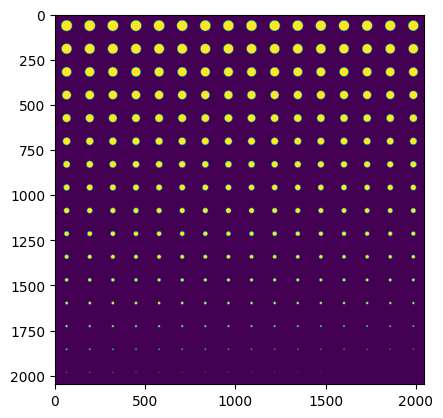

In [10]:

stacked_labels = StackedLabels()

points_per_side = 16

x_start = nx // points_per_side // 2
y_start = ny // points_per_side // 2

x_end = nx - nx // points_per_side // 2
y_end = ny - ny // points_per_side // 2

x = np.linspace(x_start, x_end, points_per_side)
y = np.linspace(y_start, y_end, points_per_side)

xv, yv = np.meshgrid(x, y)

xv_list = xv.tolist()
yv_list = yv.tolist()

input_points = [[[x, y] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xv_list, yv_list)]

results = []

maxr = 30
minr = 0.5

increment = (maxr - minr) / points_per_side**2

r = maxr

i=0
for row in input_points:
    for point in row:
        circle1 = rg.circle((nx, ny), r, (point[1]/nx, point[0]/ny) )
        stacked_labels.add_segmentation(circle1)
        r -= increment
        print(i,point)
        i+=1

labels_2d = stacked_labels.make_2d_labels("max")
labels_2d[labels_2d > 0] = 255
plt.imshow(labels_2d)
plt.show()


In [ ]:
import napari
viewer = napari.Viewer()
viewer.add_image(labels_2d)

<Image layer 'labels_2d' at 0x1adb3f5c9d0>

c:\Users\bnort\miniconda3\envs\pytorch_and_SAM3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\bnort\miniconda3\envs\pytorch_and_SAM3\lib\site-packages\skimage\util\dtype.py:564: UserWarning: Downcasting uint16 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


Predicting bounding boxes for image data



0: 1024x1024 199 objects, 47.9ms
Speed: 15.0ms preprocess, 47.9ms inference, 8.0ms postprocess per image at shape (1, 3, 1024, 1024)


[[     164.89       164.5      219.66      219.04]
 [     549.21       164.8      603.42         219]
 [     40.356      423.71      88.684      472.13]
 [     292.87      164.65      347.65      219.03]
 [     296.43      423.84      344.13      471.84]
 [     421.01      164.86      475.54      219.06]
 [      805.2      164.84       859.2      218.81]
 [     933.15      164.87      986.88      218.73]
 [     168.42      423.72      216.48      472.06]
 [     677.22       164.8      731.33      218.85]
 [     1061.2      165.07      1114.9      218.58]
 [          0      164.37      92.286      219.49]
 [     1189.2      165.18      1242.8      218.36]
 [          0           0      93.476      93.062]
 [     1191.2       294.7      1240.8       344.5]
 [     1317.2      165.32      1370.6      218.38]
 [     424.48      424.01      471.57      471.44]
 [     935.22      294.65      985.06      344.71]
 [     806.88      294.65      857.27      344.68]
 [     163.26           0      


0: 1024x1024 274 objects, 47.9ms
Speed: 8.0ms preprocess, 47.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


[[     164.89       164.5      219.66      219.04]
 [     549.21       164.8      603.42         219]
 [     40.356      423.71      88.684      472.13]
 ...
 [     930.11           0      1116.7      92.706]
 [     681.01      423.32      726.84      598.16]
 [      552.5      423.12      600.03      597.21]]
VIT checkpoint loaded successfully
area 206.0 4190468.0
label_num 1 274
solidity 0.29800105207785377 1.0
circularity 0.24766473260134192 1.0407222945487096
mean_intensity 15.015084234028276 248.8709677419355
10th_percentile_intensity 0.0 255.0
mean_hue 0.0 0.0
mean_saturation 0.0 0.0
predicted_iou 0.6321045756340027 1.0022845268249512
stability_score 0.6819428205490112 1.0
Predicting bounding boxes for image data



0: 2048x2048 238 objects, 145.6ms
Speed: 20.9ms preprocess, 145.6ms inference, 3.0ms postprocess per image at shape (1, 3, 2048, 2048)


[[     1443.2      36.034      1499.9      92.339]
 [     1699.3      35.974      1755.7      92.271]
 [     1571.3      35.974      1627.7      92.262]
 [     1187.3      35.981      1244.7      92.344]
 [     292.64      164.73      347.78      219.51]
 [     1827.3      36.037      1883.7      92.199]
 [     1315.3      35.983      1372.6      92.342]
 [     1955.4      36.019      2011.7      92.165]
 [     1059.3      35.184      1116.8      92.882]
 [     420.84         165      475.71      219.51]
 [      803.3      35.095      860.82      93.275]
 [     36.492      164.02      92.411      219.95]
 [     291.29       34.96      349.67      93.372]
 [      931.3        35.1      988.85      93.293]
 [     547.29      34.981      605.53       93.31]
 [     164.65      164.02      219.81      219.45]
 [      419.3      34.965      477.57      93.337]
 [     549.19      165.04      603.69      219.45]
 [     805.24      165.02      859.24      219.37]
 [     675.32      35.042      


0: 2048x2048 87 objects, 147.6ms
Speed: 38.1ms preprocess, 147.6ms inference, 3.0ms postprocess per image at shape (1, 3, 2048, 2048)


[[     137.56      259.99         160      283.69]
 [          0      451.92       23.76      475.82]
 [     18.023      172.51      40.948      198.82]
 [     65.159      312.54      86.589      335.97]
 [     11.066      131.61      30.263       155.3]
 [     39.862      201.04      62.338      222.56]
 [     173.17      253.23      187.52      277.84]
 [     107.87      209.17       132.6      234.81]
 [     83.498      22.054      97.834      41.032]
 [     42.709      164.44      65.204      190.82]
 [      366.9       378.7       380.4      397.05]
 [     126.66      24.339       142.3      47.745]
 [     14.766       390.1      33.608      410.26]
 [     184.24      154.03      208.29      173.97]
 [     147.01      82.331      162.58      106.02]
 [     358.72      487.11      372.31      505.45]
 [          0      299.69      16.713      319.34]
 [     55.384      7.2185      65.958      19.398]
 [     103.99      302.78      121.64      322.43]
 [      141.5      336.18      

C:\Users\bnort\work\ImageJ2022\tnia\napari-segment-everything\src\napari_segment_everything\sam_helper.py:302: RuntimeWarning: divide by zero encountered in scalar divide
  4 * np.pi * regions[0].area / (regions[0].perimeter ** 2)


area 2.0 952.0
label_num 1 87
solidity 0.49122807017543857 1.0
circularity 0.3163174271584219 inf
mean_intensity 4.0 206.8988764044944
10th_percentile_intensity 0.0 116.2
mean_hue 0.0 85.0
mean_saturation 20.28409090909091 255.0
predicted_iou 0.6718369722366333 0.9521012306213379
stability_score 0.5 1.0
Predicting bounding boxes for image data



0: 2048x2048 1554 objects, 150.6ms
Speed: 25.9ms preprocess, 150.6ms inference, 3.0ms postprocess per image at shape (1, 3, 2048, 2048)


[[     137.56      259.99         160      283.69]
 [     137.58      259.99      159.96      283.68]
 [     137.54      260.01      160.01      283.66]
 ...
 [          0       421.8      3.5421      426.76]
 [     429.85      41.797      433.24      44.134]
 [      254.8       300.8      256.21      302.21]]
VIT checkpoint loaded successfully


C:\Users\bnort\work\ImageJ2022\tnia\napari-segment-everything\src\napari_segment_everything\sam_helper.py:302: RuntimeWarning: divide by zero encountered in scalar divide
  4 * np.pi * regions[0].area / (regions[0].perimeter ** 2)


area 1.0 42807.0
label_num 1 1553
solidity 0.4692778234273715 1.0
circularity 0.028616779078382806 inf
mean_intensity 0.06739477890250399 206.8988764044944
10th_percentile_intensity 0.0 127.0
mean_hue 0.0 85.0
mean_saturation 0.364338644839444 255.0
predicted_iou 0.5188838243484497 0.952168345451355
stability_score 0.1986328363418579 1.0
